# Installing Python-Binance & MPLFinance

In [93]:
!pip install python-binance pandas mplfinance

# SETTING UP AN API FROM BINANCE 

In [94]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
# Binance dependencies that we are importing here !

# Authentication 

In [95]:
apikey = 'Nfsrvy1PGQkwqQfefM5fgR1JjdHyQr2CWZhKSjTMSTtopbg0vUoLjTSvFTI4D4Mo'
secret = 'e5tDmfVaMROqTLD17wNChVUD6WpesIeas9vdgrybPL33NDVCDP3lQvTvP7GmKiqu'

In [96]:
client = Client(apikey, secret)
#set-up th client and authenticate the binance 

# Grabbing Data from Binance 

In [97]:
crypto = client.get_all_tickers()

In [98]:
crypto
# Getting every singly currency pair with respect to their tickers & price (USDD)

[{'symbol': 'ETHBTC', 'price': '0.06134500'},
 {'symbol': 'LTCBTC', 'price': '0.00402000'},
 {'symbol': 'BNBBTC', 'price': '0.00850600'},
 {'symbol': 'NEOBTC', 'price': '0.00094900'},
 {'symbol': 'QTUMETH', 'price': '0.00299900'},
 {'symbol': 'EOSETH', 'price': '0.00182500'},
 {'symbol': 'SNTETH', 'price': '0.00002311'},
 {'symbol': 'BNTETH', 'price': '0.00149700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00015230'},
 {'symbol': 'BNBETH', 'price': '0.13874000'},
 {'symbol': 'BTCUSDT', 'price': '34706.53000000'},
 {'symbol': 'ETHUSDT', 'price': '2129.13000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001538'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [99]:
crypto[1]['price']

'0.00402000'

In [100]:
crypto_df = pd.DataFrame(crypto)
#Converting these strings into Dataframe 

In [101]:
crypto_df.head()

,symbol,price
0,ETHBTC,0.06134500
1,LTCBTC,0.00402000
2,BNBBTC,0.00850600
3,NEOBTC,0.00094900
4,QTUMETH,0.00299900


In [102]:
crypto_df.set_index('symbol', inplace=True)

In [103]:
crypto_df.head()

,price
symbol,
ETHBTC,0.06134500
LTCBTC,0.00402000
BNBBTC,0.00850600
NEOBTC,0.00094900
QTUMETH,0.00299900


In [104]:
float(crypto_df.loc['BNBBTC']['price'])

0.008506

# Getting Depth 

In [105]:
#Getting market depth if you are in BTC !
depth = client.get_order_book(symbol='BTCUSDT')

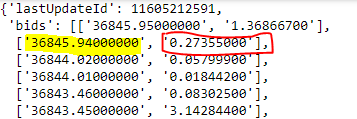
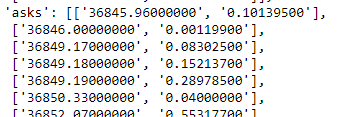
## Highlighted in yellow: BID
## Highlighted in red : Request
## with ASK 

In [106]:
depth
# getting all bids with last updated time 

{'lastUpdateId': 12092325732,
 'bids': [['34713.08000000', '0.26398400'],
  ['34708.39000000', '0.19532300'],
  ['34708.36000000', '0.21000000'],
  ['34705.46000000', '0.01416700'],
  ['34705.29000000', '0.25951800'],
  ['34705.27000000', '0.17900000'],
  ['34705.08000000', '0.40000000'],
  ['34704.96000000', '0.01440400'],
  ['34703.40000000', '0.05971700'],
  ['34703.39000000', '0.05761400'],
  ['34702.44000000', '0.01503000'],
  ['34699.88000000', '0.00300000'],
  ['34699.50000000', '0.33145100'],
  ['34699.49000000', '0.94700000'],
  ['34698.42000000', '0.26400000'],
  ['34698.27000000', '0.37350000'],
  ['34698.26000000', '1.00000000'],
  ['34698.08000000', '0.06714000'],
  ['34697.37000000', '0.89300000'],
  ['34697.02000000', '0.43739900'],
  ['34697.01000000', '1.63000000'],
  ['34696.63000000', '0.49971400'],
  ['34695.65000000', '0.31410300'],
  ['34695.31000000', '0.04000000'],
  ['34694.76000000', '0.09999900'],
  ['34693.86000000', '0.00057700'],
  ['34693.72000000', '0.27

In [214]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'ASK_Volume']
depth_df.head()

,Price,ASK_Volume
0,34713.09000000,0.10890000
1,34713.46000000,0.00432000
2,34713.62000000,0.01920300
3,34716.75000000,0.03354300
4,34717.20000000,0.00168200


In [215]:
depth_df1 = pd.DataFrame(depth['bids'])
depth_df1.columns = ['Price', 'BIDS_Volume']
depth_df1.head()

,Price,BIDS_Volume
0,34713.08000000,0.26398400
1,34708.39000000,0.19532300
2,34708.36000000,0.21000000
3,34705.46000000,0.01416700
4,34705.29000000,0.25951800


In [216]:
depth_df.dtypes

Price         object
ASK_Volume    object
dtype: object

# Fetching Historical Data 

In [217]:
client.get_historical_klines??

In [218]:
historical = client.get_historical_klines('BNBBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [112]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

Taker buy means the buyer is the taker and seller is the maker.

Base asset means the quantity is expressed as the amount of coins that were received by the buyer (as opposed to quote asset which would be the amount paid by the buyer in btc/eth/usdt, depending on the market)

'Volume' is the total amount of traded coins in the timeframe, disregarding which side is the taker


'Volume' - ' Taker buy base asset volume' + ' Maker buy base asset volume'

------------------------

The Maker is the person who puts an order in the orderbook. Taker is the one that matches an existing order.

An order goes through immediately once a match can be made, so there is always a maker and a taker. Even when both are using Limit orders. The one that comes second gets matched immediately, therefore his/her order never gets in the book and he/she is a taker.

In [219]:
historical

[[1499990400000,
  '0.00005000',
  '0.00005480',
  '0.00001000',
  '0.00003871',
  '12156463.00000000',
  1500076799999,
  '551.68052108',
  2795,
  '7739697.00000000',
  '352.74570073',
  '87433964.27346950'],
 [1500076800000,
  '0.00003871',
  '0.00003990',
  '0.00003102',
  '0.00003803',
  '3610651.00000000',
  1500163199999,
  '134.85918457',
  698,
  '1643207.00000000',
  '62.93034319',
  '98378406.25346950'],
 [1500163200000,
  '0.00003807',
  '0.00004263',
  '0.00003710',
  '0.00003915',
  '2209705.00000000',
  1500249599999,
  '87.76457671',
  333,
  '1206264.00000000',
  '48.28988317',
  '98609964.18446950'],
 [1500249600000,
  '0.00003915',
  '0.00004390',
  '0.00003756',
  '0.00004050',
  '2134023.00000000',
  1500335999999,
  '88.05577690',
  317,
  '1126599.00000000',
  '47.40746332',
  '98956088.02986950'],
 [1500336000000,
  '0.00004051',
  '0.00004600',
  '0.00003750',
  '0.00003750',
  '2836072.00000000',
  1500422399999,
  '117.74406489',
  433,
  '1230661.00000000',


In [220]:
hist_df = pd.DataFrame(historical)

In [221]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [222]:
hist_df.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1499990400000,0.00005000,0.00005480,0.00001000,0.00003871,12156463.00000000,1500076799999,551.68052108,2795,7739697.00000000,352.74570073,87433964.27346950
1,1500076800000,0.00003871,0.00003990,0.00003102,0.00003803,3610651.00000000,1500163199999,134.85918457,698,1643207.00000000,62.93034319,98378406.25346950
2,1500163200000,0.00003807,0.00004263,0.00003710,0.00003915,2209705.00000000,1500249599999,87.76457671,333,1206264.00000000,48.28988317,98609964.18446950
3,1500249600000,0.00003915,0.00004390,0.00003756,0.00004050,2134023.00000000,1500335999999,88.05577690,317,1126599.00000000,47.40746332,98956088.02986950
4,1500336000000,0.00004051,0.00004600,0.00003750,0.00003750,2836072.00000000,1500422399999,117.74406489,433,1230661.00000000,52.17727228,99110713.92989950


In [223]:
hist_df.shape

(1446, 12)

In [224]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# Preprocessing on the Histoical dataframe

In [225]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [226]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [227]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [228]:
hist_df.tail(50)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1396,2021-05-10,0.011367,0.011744,0.010978,0.011310,646318.47,2021-05-10 23:59:59.999000064,7417.992599,409351,327509.58,3755.552645,0
1397,2021-05-11,0.011310,0.011929,0.011268,0.011854,568527.15,2021-05-11 23:59:59.999000064,6654.486086,311260,302460.50,3542.038659,0
1398,2021-05-12,0.011851,0.012074,0.011594,0.011970,469943.04,2021-05-12 23:59:59.999000064,5548.431068,334936,248761.54,2938.466498,0
1399,2021-05-13,0.011991,0.012352,0.011221,0.011496,729551.70,2021-05-13 23:59:59.999000064,8652.201666,531593,359561.85,4269.470580,0
1400,2021-05-14,0.011496,0.012100,0.011426,0.012094,389929.62,2021-05-14 23:59:59.999000064,4618.852171,288871,212578.53,2517.850791,0
1401,2021-05-15,0.012094,0.012166,0.011890,0.012047,336711.90,2021-05-15 23:59:59.999000064,4050.871112,242879,177985.33,2142.254271,0
1402,2021-05-16,0.012048,0.012299,0.011793,0.012144,363402.77,2021-05-16 23:59:59.999000064,4397.963317,268464,186294.58,2255.858503,0
1403,2021-05-17,0.012156,0.012158,0.011450,0.011762,548904.99,2021-05-17 23:59:59.999000064,6488.914422,337079,286572.92,3391.200771,0
1404,2021-05-18,0.011763,0.011990,0.011501,0.011853,544564.32,2021-05-18 23:59:59.999000064,6382.192942,261756,284725.25,3335.500031,0
1405,2021-05-19,0.011852,0.011912,0.008663,0.009132,1636755.03,2021-05-19 23:59:59.999000064,16725.470117,927196,797375.26,8162.796488,0


In [229]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [230]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1446.000000,1446.000000,1446.000000,1446.000000,1.446000e+03,1446.000000,1.446000e+03,1.446000e+03,1446.000000
mean,0.002384,0.002465,0.002302,0.002390,2.031021e+06,3620.443342,1.053288e+05,1.054833e+06,1882.059358
std,0.002126,0.002208,0.002036,0.002130,2.248261e+06,3540.215100,1.179343e+05,1.181754e+06,1858.303499
min,0.000037,0.000037,0.000010,0.000037,4.298590e+04,45.881937,3.170000e+02,1.620377e+04,17.327490
25%,0.001490,0.001515,0.001441,0.001491,8.577323e+05,1446.588898,4.551975e+04,4.364043e+05,725.548514
50%,0.001899,0.001932,0.001851,0.001899,1.341200e+06,2395.252981,7.533550e+04,6.845594e+05,1232.688914
75%,0.002512,0.002589,0.002426,0.002513,2.415801e+06,4627.305366,1.181820e+05,1.268934e+06,2460.352692
max,0.012156,0.012352,0.011890,0.012144,2.399483e+07,43924.177840,1.522192e+06,1.301429e+07,22398.475081


In [231]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1446 non-null   datetime64[ns]
 1   Open                1446 non-null   float64       
 2   High                1446 non-null   float64       
 3   Low                 1446 non-null   float64       
 4   Close               1446 non-null   float64       
 5   Volume              1446 non-null   float64       
 6   Close Time          1446 non-null   datetime64[ns]
 7   Quote Asset Volume  1446 non-null   float64       
 8   Number of Trades    1446 non-null   int64         
 9   TB Base Volume      1446 non-null   float64       
 10  TB Quote Volume     1446 non-null   float64       
 11  Ignore              1446 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 135.7+ KB


### Checking Null Values 

In [232]:
hist_df.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

# Visualization 

In [233]:
import mplfinance as mpf
import seaborn as sns
sns.set()

In [234]:
hist_df.set_index('Close Time').tail(100)


,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2021-03-21 23:59:59.999000064,2021-03-21,0.004548,0.004701,0.004516,0.004616,389444.37,1794.684359,192777,192759.78,888.590082,0
2021-03-22 23:59:59.999000064,2021-03-22,0.004615,0.004849,0.004593,0.004716,620050.08,2915.943095,251250,322010.63,1513.319658,0
2021-03-23 23:59:59.999000064,2021-03-23,0.004716,0.004806,0.004650,0.004701,380268.60,1796.220214,172673,187252.56,884.411660,0
2021-03-24 23:59:59.999000064,2021-03-24,0.004701,0.004760,0.004603,0.004751,513715.79,2408.852932,211839,281757.13,1322.007258,0
2021-03-25 23:59:59.999000064,2021-03-25,0.004751,0.004753,0.004444,0.004561,619503.64,2836.468974,224072,303886.32,1391.090301,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24 23:59:59.999000064,2021-06-24,0.008793,0.009208,0.008679,0.008901,264244.80,2370.414647,124680,130071.62,1167.182698,0
2021-06-25 23:59:59.999000064,2021-06-25,0.008902,0.008983,0.008519,0.008893,215089.93,1883.867208,119763,115335.83,1010.737226,0
2021-06-26 23:59:59.999000064,2021-06-26,0.008893,0.008960,0.008563,0.008668,170944.76,1498.823190,100955,89379.95,784.237853,0


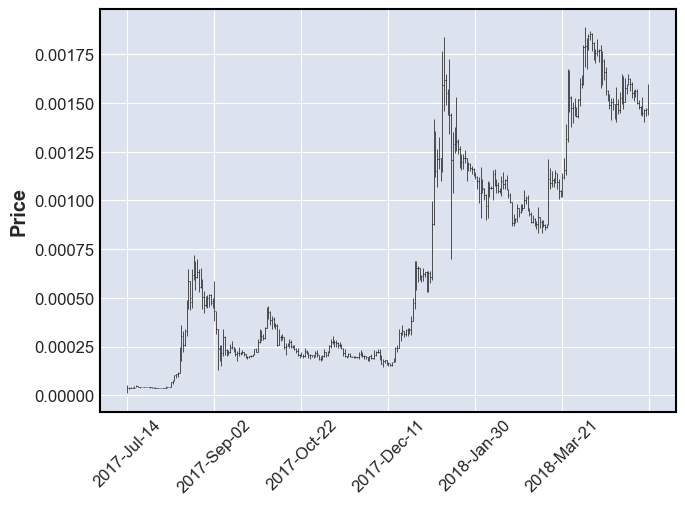

In [235]:
mpf.plot(hist_df.set_index('Close Time').head(300))

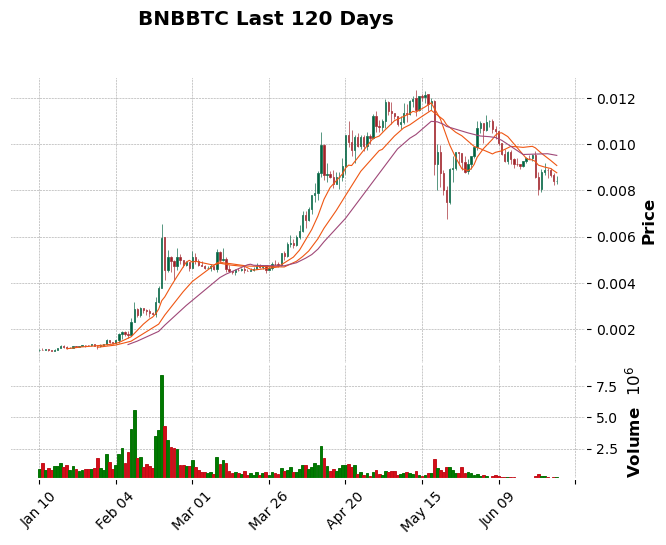

In [236]:
mpf.plot(hist_df.set_index('Close Time').tail(170), 
        type='candle', style='charles', 
        volume=True, 
        title='BNBBTC Last 120 Days', 
        mav=(10,20,30))

# Analysis

In [237]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [238]:
hist_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-07-14,0.000050,0.000055,0.000010,0.000039,12156463.00,2017-07-14 23:59:59.999000064,551.680521,2795,7739697.00,352.745701,87433964.27346950
1,2017-07-15,0.000039,0.000040,0.000031,0.000038,3610651.00,2017-07-15 23:59:59.999000064,134.859185,698,1643207.00,62.930343,98378406.25346950
2,2017-07-16,0.000038,0.000043,0.000037,0.000039,2209705.00,2017-07-16 23:59:59.999000064,87.764577,333,1206264.00,48.289883,98609964.18446950
3,2017-07-17,0.000039,0.000044,0.000038,0.000041,2134023.00,2017-07-17 23:59:59.999000064,88.055777,317,1126599.00,47.407463,98956088.02986950
4,2017-07-18,0.000041,0.000046,0.000037,0.000037,2836072.00,2017-07-18 23:59:59.999000064,117.744065,433,1230661.00,52.177272,99110713.92989950
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2021-06-24,0.008793,0.009208,0.008679,0.008901,264244.80,2021-06-24 23:59:59.999000064,2370.414647,124680,130071.62,1167.182698,0
1442,2021-06-25,0.008902,0.008983,0.008519,0.008893,215089.93,2021-06-25 23:59:59.999000064,1883.867208,119763,115335.83,1010.737226,0
1443,2021-06-26,0.008893,0.008960,0.008563,0.008668,170944.76,2021-06-26 23:59:59.999000064,1498.823190,100955,89379.95,784.237853,0
1444,2021-06-27,0.008669,0.008738,0.008217,0.008387,189776.98,2021-06-27 23:59:59.999000064,1600.511386,94530,98293.97,829.573946,0


In [239]:
df = hist_df.copy()

In [240]:
df = df.drop(['Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore'],axis = 1)
df.head()

,Open Time,Open,High,Low,Close,Volume
0,2017-07-14,0.000050,0.000055,0.000010,0.000039,12156463.0
1,2017-07-15,0.000039,0.000040,0.000031,0.000038,3610651.0
2,2017-07-16,0.000038,0.000043,0.000037,0.000039,2209705.0
3,2017-07-17,0.000039,0.000044,0.000038,0.000041,2134023.0
4,2017-07-18,0.000041,0.000046,0.000037,0.000037,2836072.0


In [241]:
features = df.drop(['Open Time','Close'],axis = 1)
target = df['Close']

In [242]:
df.describe()

,Open,High,Low,Close,Volume
count,1446.000000,1446.000000,1446.000000,1446.000000,1.446000e+03
mean,0.002384,0.002465,0.002302,0.002390,2.031021e+06
std,0.002126,0.002208,0.002036,0.002130,2.248261e+06
min,0.000037,0.000037,0.000010,0.000037,4.298590e+04
25%,0.001490,0.001515,0.001441,0.001491,8.577323e+05
50%,0.001899,0.001932,0.001851,0.001899,1.341200e+06
75%,0.002512,0.002589,0.002426,0.002513,2.415801e+06
max,0.012156,0.012352,0.011890,0.012144,2.399483e+07


In [297]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.27,random_state = 42)

In [298]:
features.head()

,Open,High,Low,Volume
0,0.000050,0.000055,0.000010,12156463.0
1,0.000039,0.000040,0.000031,3610651.0
2,0.000038,0.000043,0.000037,2209705.0
3,0.000039,0.000044,0.000038,2134023.0
4,0.000041,0.000046,0.000037,2836072.0


In [299]:
target.head()

0    0.000039
1    0.000038
2    0.000039
3    0.000041
4    0.000037
Name: Close, dtype: float64

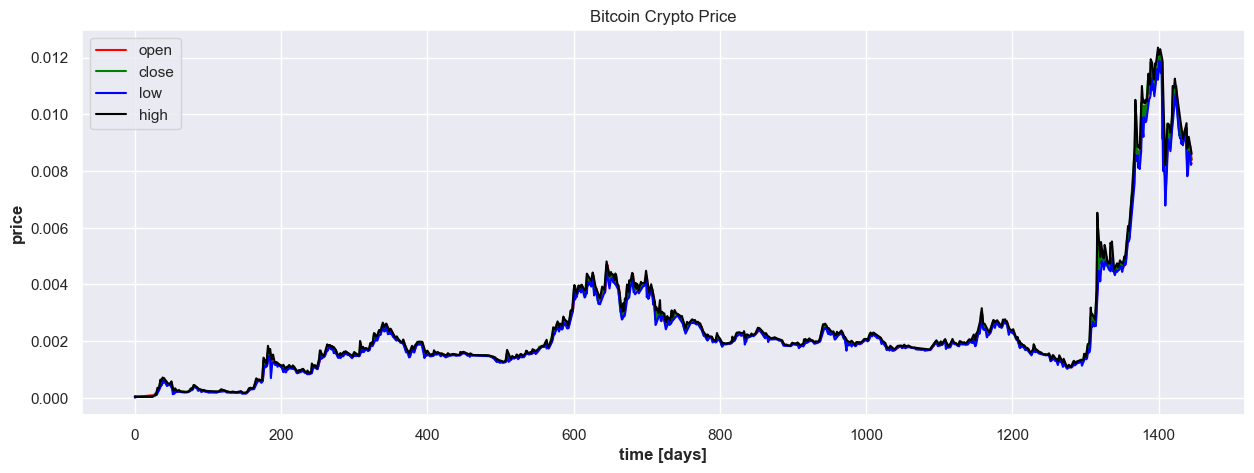

In [300]:
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('Bitcoin Crypto Price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [301]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features.values,target.values,test_size = 0.27,random_state = 42)

In [302]:
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor

In [303]:
rfg =RandomForestRegressor()
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [304]:
prediction[1]

0.0017393250000000001

In [295]:
y_test[1]

0.0017399

In [305]:
from sklearn.metrics import mean_absolute_error as mae

print(f'Absolute Mean Error:{mae(y_test, prediction)}')

Absolute Mean Error:4.735242352941166e-05


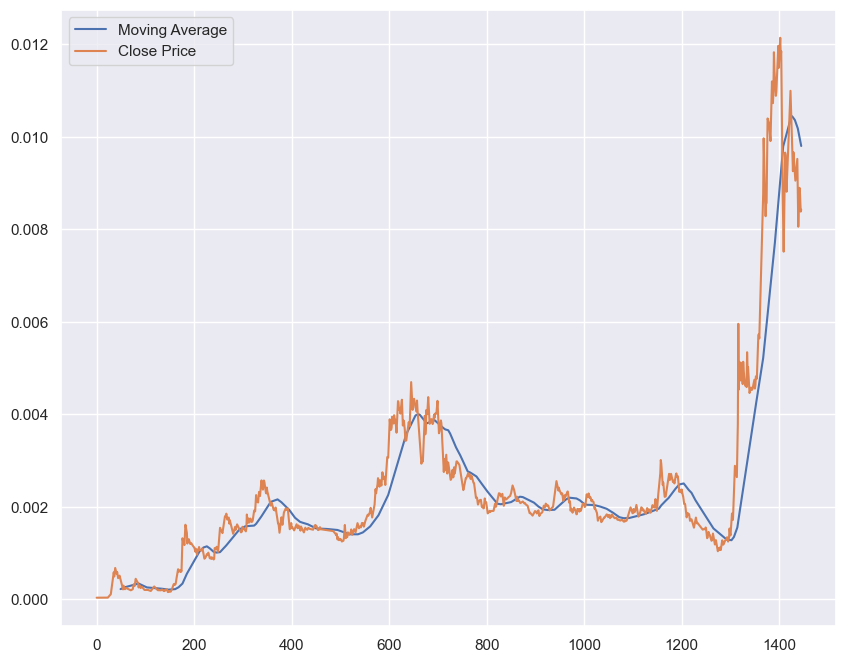

In [262]:
df['MA50'] = df['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(10, 8))
df['MA50'].plot(label='Moving Average')
df['Close'].plot(label='Close Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price Return')

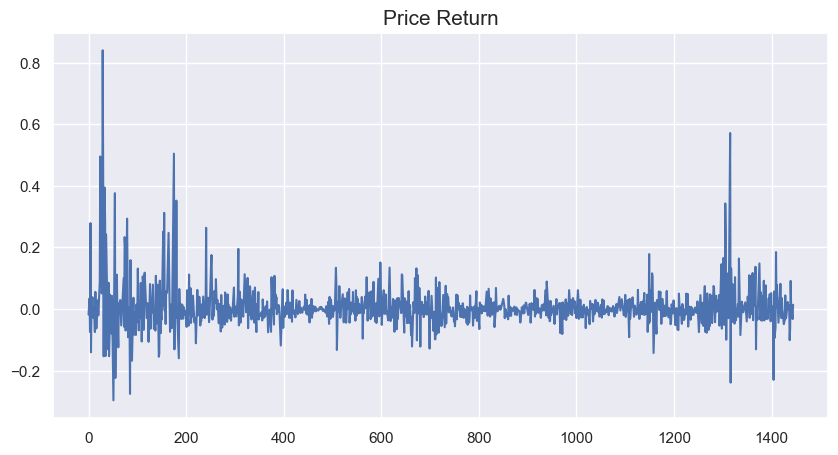

In [194]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df['Return'] = df['PriceDiff'] /df['Close']
df['Return'].plot(figsize=(10,5))
plt.title('Price Return', size = 15)

Text(0.5, 1.0, 'Profit from Moving Stock')

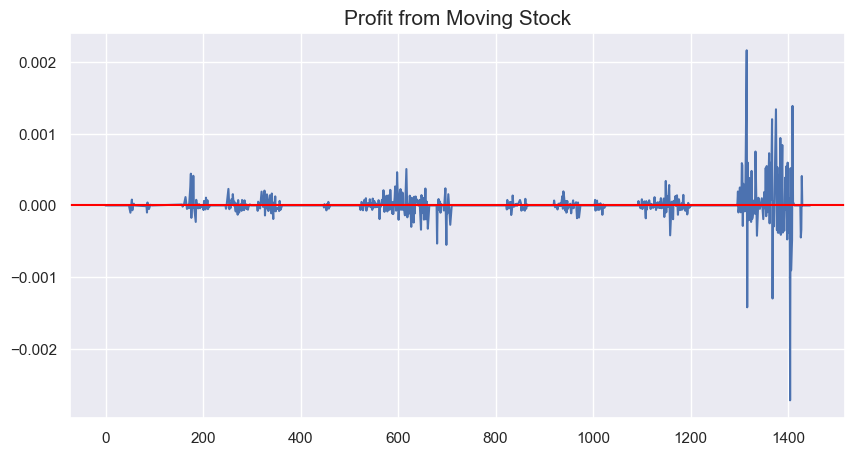

In [263]:
df['MA10'] = df['Close'].rolling(10).mean()
df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot(figsize=(10,5))
plt.axhline(y=0, color='red')
plt.title('Profit from Moving Stock', size = 15)

Text(0.5, 1.0, 'Total money you have made: 0.008045030000000002')

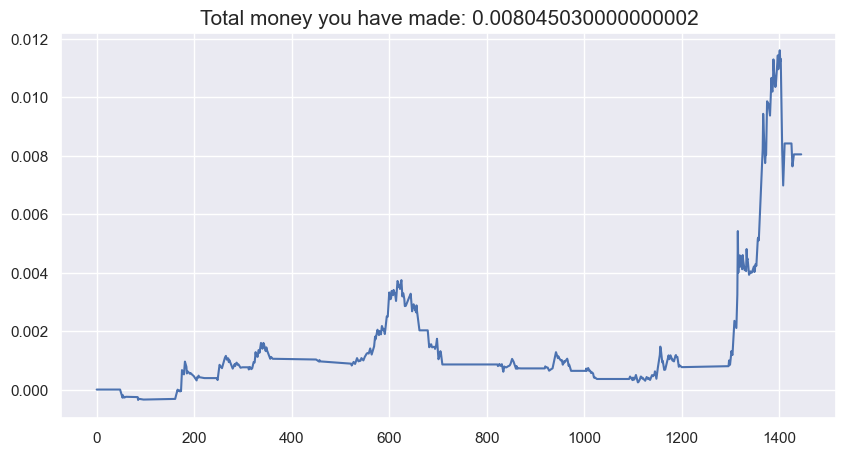

In [264]:
df['wealth'] = df['Profit'].cumsum()
df['wealth'].plot(figsize=(10,5))
plt.title('Total money you have made: {}'.format(df.loc[df.index[-2], 'wealth']), size = 15)

In [265]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)
prob_return1 = norm.cdf(-0.10, mu, sigma)
print(f'The probability of dropping over 10% in one day : {prob_return1}')

The probability of dropping over 10% in one day : 0.04761441003469231


In [266]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
prob_return2 = norm.cdf(-0.10, mu220, sigma220)
print('The probability of dropping over 25% over a year: ', prob_return2)

The probability of dropping over 25% over a year:  0.10953389651351547


In [267]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.09853378329561803
